In [2]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
train[train.columns[[2,4,5,1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [4]:
# 使用する列だけを取得
data = train[['Sex', 'Age', 'Pclass', 'Survived']].copy()
data['Sex'] = data['Sex'] == 'female'
data = data.dropna()
data[:3]

,Sex,Age,Pclass,Survived
0,False,22.0,3,0
1,True,38.0,1,1
2,True,26.0,3,1


In [5]:
data_np = data.astype(np.int32).values
x  = data_np[:,:-1]
y = data_np[:, -1]

In [6]:
x[:3]

array([[ 0, 22,  3],
       [ 1, 38,  1],
       [ 1, 26,  3]], dtype=int32)

In [7]:
y[:3]

array([0, 1, 1], dtype=int32)

In [10]:
female = x[:, 0] == 1
survived = y == 1
age = x[:,1]
bins_ = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female], bins=bins_)[0],
        'female': np.histogram(age[survived & female], bins=bins_)[0]}
D = {'male': np.histogram(age[~survived & ~female], bins=bins_)[0],
         'female': np.histogram(age[~survived & female], bins=bins_)[0]}

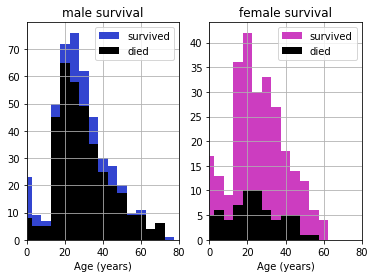

In [12]:
# 性別、年齢別での生存率表示
bins = bins_[:-1]
for i, sex, color in zip((0,1),
                                      ('male', 'female'),
                                       ('#3345d0', '#cc3dc0')):
    plt.subplot(121 + i)
    plt.bar(bins, S[sex], bottom=D[sex], color=color, width=5, label='survived')
    plt.bar(bins, D[sex], color='k', width=5, label='died')
    plt.xlim(0, 80)
    plt.grid(None)
    plt.title(sex + " survival")
    plt.xlabel("Age (years)")
    plt.legend()

In [15]:
(X_train, X_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.05)
logreg = lm.LogisticRegression()

In [16]:
logreg.fit(X_train, y_train) # 学習
y_predicted = logreg.predict(X_test) # 予測

Text(0.5,1,'Actual and predicted suvival outcomes on the test set')

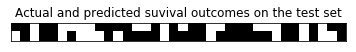

In [17]:
plt.imshow(np.vstack((y_test, y_predicted)), interpolation='none', cmap='bone')
plt.xticks([])
plt.yticks([])
plt.title(("Actual and predicted suvival " "outcomes on the test set")) # テストデータによる予測と実際の結果の比較

In [18]:
# 制度を表示
cv.cross_val_score(logreg, x, y)

array([ 0.78661088,  0.78991597,  0.78059072])

In [20]:
# ロジスティック回帰のハイパーパラメータCを見つける
grid = gs.GridSearchCV(logreg, {'C': np.logspace(-5, 5, 50)})
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.19306977288832497}

In [21]:
# 最良のパラメータを使った結果を表示する
cv.cross_val_score(grid.best_estimator_, x, y)

array([ 0.80334728,  0.78991597,  0.7721519 ])